In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
plt.rcParams['figure.figsize'] = (4,3)

In [17]:
data = sns.load_dataset('penguins')

___

# Text and annotations 

## Using `Text`

#### place a text at a x,y position

We add text objects to the axes directly

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html

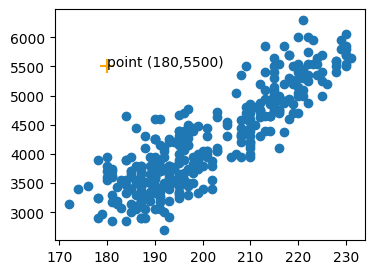

In [18]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500

# make a mark at a particular x,y 
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

# place a text at the same x,y
text1 = ax.text(pointx, pointy, "point ({},{})".format(pointx, pointy))

We can call the alignment of the text in respect to x,y directly in the function: 

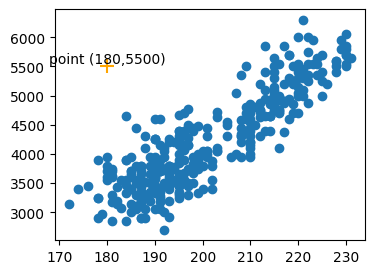

In [19]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500

ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)
text1 = ax.text(pointx, pointy, "point ({},{})".format(pointx, pointy), 
                ha='center', va='bottom')

#### rotate and style the text 

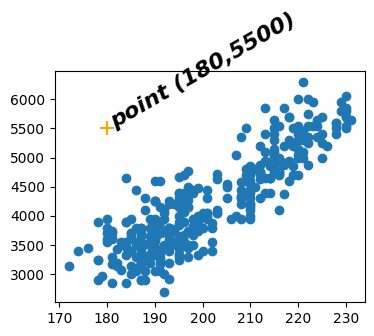

In [20]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)
text1 = ax.text(x=pointx, y=pointy, s="point ({},{})".format(pointx, pointy), 
               fontsize=16, rotation=30, fontstyle='italic', fontweight='bold')


#### multi-line text 

Multiline text needs to be wrapped manually :( We can do it by hand by inserting `\n` or we can use `textwrap`
https://docs.python.org/3/library/textwrap.html#module-textwrap (it's built-in in Python)

In [21]:
from textwrap import fill as tw_fill

very_long_text = 'This is a really really long annotation that we need to squeeze in a tiny bbox'
wrapped_text = tw_fill(very_long_text, width=25)
wrapped_text

'This is a really really\nlong annotation that we\nneed to squeeze in a tiny\nbbox'

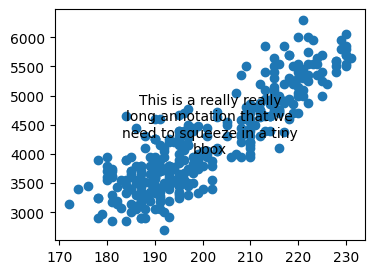

In [22]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

text1 = ax.text(x=0.5, y=0.5, transform=ax.transAxes, # relative position 
                ha='center', va='center', # position refers to the middle of the textbox 
                s=wrapped_text)

#### styling the text and its background 

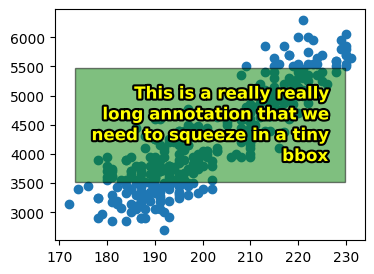

In [23]:
import matplotlib.patheffects as path_effects

f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

text1 = ax.text(x=0.5, y=0.5, transform=ax.transAxes, # relative position 
                horizontalalignment='center', verticalalignment='center', # position refers to the middle of the textbox 
                s=wrapped_text, # the text string 
                multialignment='right', # aligning the many lines 
                color='yellow', size=12, fontweight='bold', # customize the font 
                 bbox={'alpha':0.5, 'facecolor':'green', 'boxstyle':'square,pad=1'} # customize the style of the background box 
               )

text1.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()]) # fancy path outline


This is useful e.g. to place watermarks on images 

More on path effects: https://matplotlib.org/stable/tutorials/advanced/patheffects_guide.html 

### Using `ax.annotate`

#### difference between ax.text and ax.annotate

It's basically a text with an arrow. But with a different API :( 

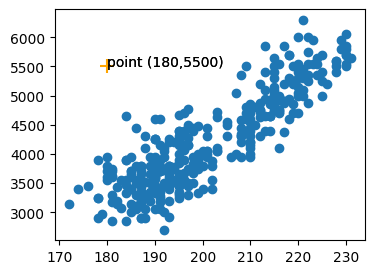

In [24]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

# step 1: let's make two points 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

anno1 = ax.annotate(xy=(pointx, pointy), text="point ({},{})".format(pointx, pointy)) 
text1 = ax.text(x=pointx, y=pointy, s="point ({},{})".format(pointx, pointy)) 
## anno1 and text1 produce the same result


#### placing an annotation of a one data point at a different point 

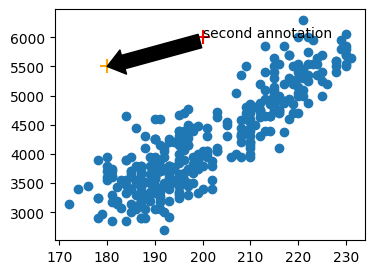

In [25]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

# step 1: let's make two points 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

# anno1 = ax.annotate(xy=(pointx, pointy), text="point ({},{})".format(pointx, pointy)) 
# text1 = ax.text(x=pointx, y=pointy, s="point ({},{})".format(pointx, pointy)) 
## anno1 and text1 produce the same result

annox = 200 
annoy = 6000
ax.scatter(x=annox, y=annoy, color='red', marker='+', s=100)


# step 2: let's make an Annotation between those two points 

anno2 = ax.annotate(xy=(pointx, pointy), text="second annotation", 
                   xytext=(annox,annoy), 
                   arrowprops=dict(facecolor='black', width=10, headwidth=18)) 

#### curved arrows 

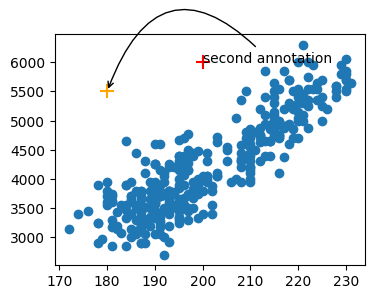

In [26]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

annox = 200 
annoy = 6000
ax.scatter(x=annox, y=annoy, color='red', marker='+', s=100)


anno2 = ax.annotate(xy=(pointx, pointy), text="second annotation", 
                   xytext=(annox,annoy), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"),)

the arrow starts in a weird spot - in the middle of the text! What is happening? How to fix this? 

Move the center of the text to the red point: 

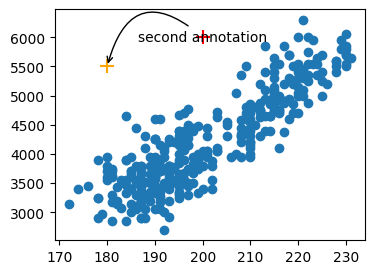

In [27]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

annox = 200 
annoy = 6000
ax.scatter(x=annox, y=annoy, color='red', marker='+', s=100)

anno2 = ax.annotate(xy=(pointx, pointy), text="second annotation", 
                   xytext=(annox,annoy), 
                    ha='center', va='center', # move the center of the annotation to the point 
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"), 
                   zorder=99) 

More on fancy arrows: 
https://matplotlib.org/stable/tutorials/text/annotations.html#advanced-annotations 
https://matplotlib.org/stable/gallery/text_labels_and_annotations/arrow_demo.html

#### many arrows 

If you need many arrows starting from a given point: draw arrows and text separately

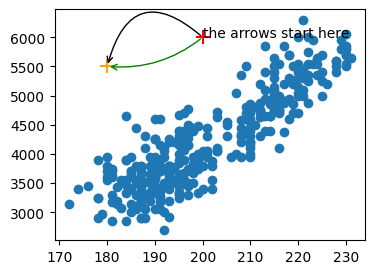

In [28]:
f, ax = plt.subplots()
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']); 

pointx = 180
pointy = 5500
ax.scatter(x=pointx, y=pointy, color='orange', marker='+', s=100)

annox = 200 
annoy = 6000
ax.scatter(x=annox, y=annoy, color='red', marker='+', s=100)

anno2 = ax.annotate(xy=(pointx, pointy), text="", 
                   xytext=(annox,annoy),  
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"), 
                   zorder=99) 

anno3 = ax.annotate(xy=(pointx, pointy), text="", 
                   xytext=(annox,annoy),  
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", ec='green'), 
                   zorder=99) 

annotext = ax.text(x=annox, y=annoy, s="the arrows start here")

___